In [37]:
import os
from datetime import datetime
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

In [2]:
latest_date = '20230728'

In [3]:
def get_stock_fundamental(date, ticker):
    # 펀더멘탈 정보 읽어 오기
    df_stock = stock.get_market_fundamental(date, date, ticker)
    # 인덱스 이름 제거
    df_stock.index.name = None
    # 인덱스를 티커로 변경
    df_stock.index = [ticker]
    # 이름 읽어 오기
    name = stock.get_market_ticker_name(ticker)
    # 첫 번째 열에 삽입하기
    df_stock.insert(0, 'Name', name)
    # 주식 데이터 리턴
    return df_stock

In [4]:
# 코스피 상장 주식을 시가총액 순으로 가져 오기
df_kospi = stock.get_market_cap(latest_date, market='KOSPI')

In [5]:
len(df_kospi)

949

In [6]:
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 005930 to 001527
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종가      949 non-null    int64
 1   시가총액    949 non-null    int64
 2   거래량     949 non-null    int64
 3   거래대금    949 non-null    int64
 4   상장주식수   949 non-null    int64
dtypes: int64(5)
memory usage: 44.5+ KB


In [7]:
csv_file_name = f'kospi_stock_{latest_date}.csv'

In [8]:
#주가 펀더멘탈 정보 가져 오기
df_kospi_target = None
start_time = time.time()
#for idx, ticker in enumerate(df_kospi.head(10).index):
for idx, ticker in enumerate(df_kospi.index):
    #print(f'{idx+1:03d}: {ticker}')
    df_stock_fundamental = get_stock_fundamental(latest_date, ticker)
    #isplay(df_stock_fundamental)
    if not os.path.exists(csv_file_name):
        #df_kospi_target = df_stock_fundamental
        df_stock_fundamental.to_csv(csv_file_name, mode='w', index=False)
    else:
        #df_kospi_target = pd.concat([df_kospi_target, df_stock_fundamental])
        df_stock_fundamental.to_csv(csv_file_name, mode='a', header=False, index=False)
    time.sleep(1)
end_time = time.time()
print('')
print('')
print('*'*50)
print(f'소요 시간: {round(end_time - start_time)} seconds')
print('*'*50)



**************************************************
소요 시간: 1013 seconds
**************************************************


# load kospi data from csv file

In [31]:
df = pd.read_csv(csv_file_name)
df

,Name,BPS,PER,PBR,EPS,DIV,DPS
0,삼성전자,57822.0,8.76,1.22,8057.0,2.05,1444.0
1,LG에너지솔루션,80052.0,163.94,6.77,3306.0,0.00,0.0
2,SK하이닉스,92004.0,39.48,1.39,3242.0,0.94,1200.0
3,삼성바이오로직스,126233.0,68.52,6.21,11442.0,0.00,0.0
4,POSCO홀딩스,692323.0,14.93,0.89,41456.0,1.94,12000.0
...,...,...,...,...,...,...,...
944,성문전자우,0.0,0.00,0.00,0.0,0.18,10.0
945,진흥기업2우B,0.0,0.00,0.00,0.0,0.00,0.0
946,동양우,0.0,0.00,0.00,0.0,1.73,90.0
947,유유제약2우B,0.0,0.00,0.00,0.0,1.12,110.0


In [32]:
# 지표 중 0 값을 가진 주식 제거
df_div = df[(df==0).sum(1) < 1]
df_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
0,삼성전자,57822.0,8.76,1.22,8057.0,2.05,1444.0
2,SK하이닉스,92004.0,39.48,1.39,3242.0,0.94,1200.0
4,POSCO홀딩스,692323.0,14.93,0.89,41456.0,1.94,12000.0
6,LG화학,445524.0,27.46,1.46,23670.0,1.54,10000.0
7,삼성SDI,251948.0,22.71,2.63,29191.0,0.16,1030.0
...,...,...,...,...,...,...,...
869,한솔PNS,2311.0,17.05,0.68,92.0,1.59,25.0
875,SHD,42355.0,2.82,0.59,8905.0,0.40,100.0
876,모두투어리츠,NaN,NaN,NaN,NaN,NaN,NaN
879,진도,8369.0,6.51,0.29,367.0,2.93,70.0


In [34]:
# 결측치를 가진 주식 제거
df_div = df_div.dropna()
df_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
0,삼성전자,57822.0,8.76,1.22,8057.0,2.05,1444.0
2,SK하이닉스,92004.0,39.48,1.39,3242.0,0.94,1200.0
4,POSCO홀딩스,692323.0,14.93,0.89,41456.0,1.94,12000.0
6,LG화학,445524.0,27.46,1.46,23670.0,1.54,10000.0
7,삼성SDI,251948.0,22.71,2.63,29191.0,0.16,1030.0
...,...,...,...,...,...,...,...
852,성문전자,1756.0,15.27,0.97,112.0,0.29,5.0
858,동일제강,7970.0,11.04,0.23,169.0,0.54,10.0
869,한솔PNS,2311.0,17.05,0.68,92.0,1.59,25.0
875,SHD,42355.0,2.82,0.59,8905.0,0.40,100.0


In [41]:
# 배당률 기준 내림차순 정렬
df_div= df_div.sort_values(by=['DIV'], ascending=False )
df_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
391,일성신약,60174.0,1.67,0.39,14122.0,16.97,4005.0
41,우리금융지주,39505.0,2.74,0.29,4191.0,9.84,1130.0
143,JB금융지주,23551.0,2.86,0.36,2996.0,9.73,835.0
125,BNK금융지주,30468.0,2.79,0.22,2404.0,9.33,625.0
42,기업은행,36302.0,3.13,0.29,3320.0,9.25,960.0
...,...,...,...,...,...,...,...
88,한미약품,70131.0,41.37,3.92,6648.0,0.18,500.0
7,삼성SDI,251948.0,22.71,2.63,29191.0,0.16,1030.0
174,후성,3882.0,12.30,3.32,1047.0,0.16,20.0
12,카카오,22893.0,16.29,2.21,3106.0,0.12,60.0


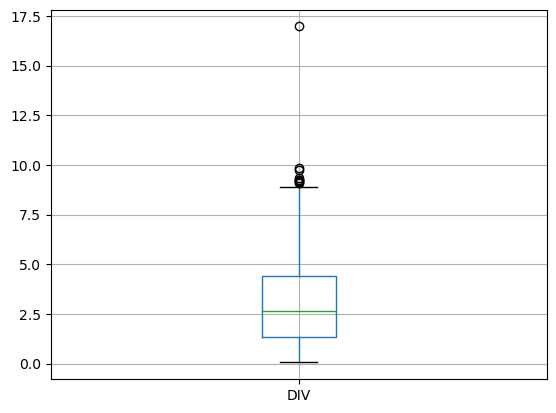

In [42]:
#df_div.boxplot(column=['PER', 'PBR', 'DIV'])
df_div.boxplot(column=['DIV'])
plt.show()

In [44]:
df_kospi_div_top100 = df_div.head(100)
df_kospi_div_top100

,Name,BPS,PER,PBR,EPS,DIV,DPS
391,일성신약,60174.0,1.67,0.39,14122.0,16.97,4005.0
41,우리금융지주,39505.0,2.74,0.29,4191.0,9.84,1130.0
143,JB금융지주,23551.0,2.86,0.36,2996.0,9.73,835.0
125,BNK금융지주,30468.0,2.79,0.22,2404.0,9.33,625.0
42,기업은행,36302.0,3.13,0.29,3320.0,9.25,960.0
...,...,...,...,...,...,...,...
756,인터지스,8867.0,2.23,0.27,1092.0,4.94,120.0
655,화성산업,39046.0,4.56,0.26,2229.0,4.92,500.0
587,극동유화,5808.0,6.88,0.70,593.0,4.90,200.0
224,한일시멘트,20910.0,10.41,0.57,1138.0,4.89,580.0


In [46]:
kospi_div_top100_{latest_date}.csv
df_kospi_div_top100.to_csv(f'kospi_div_top100_{latest_date}.csv')

In [49]:
df_kospi_div_top100.head(30)

,Name,BPS,PER,PBR,EPS,DIV,DPS
391,일성신약,60174.0,1.67,0.39,14122.0,16.97,4005.0
41,우리금융지주,39505.0,2.74,0.29,4191.0,9.84,1130.0
143,JB금융지주,23551.0,2.86,0.36,2996.0,9.73,835.0
125,BNK금융지주,30468.0,2.79,0.22,2404.0,9.33,625.0
42,기업은행,36302.0,3.13,0.29,3320.0,9.25,960.0
177,GS건설,56917.0,3.53,0.25,3997.0,9.22,1300.0
644,한양증권,36091.0,4.68,0.24,1858.0,9.20,800.0
499,금호건설,15149.0,9.32,0.36,587.0,9.14,500.0
175,DGB금융지주,31812.0,3.16,0.23,2266.0,9.07,650.0
244,대신증권,74528.0,7.71,0.18,1750.0,8.90,1200.0


# FIN

In [ ]:
# 배당금 상위 100개 기업 통계 
df_kospi_div_top_100.describe()

In [ ]:
df_kospi_div_top_100.boxplot(column=['PER', 'PBR', 'DIV'])

In [ ]:
df_kospi_div_top_100.to_excel('코스피_배당률_Top100-' + latest_date + '.xlsx')

In [ ]:
# 배당금 상위 100개 기업 평균 데이터
df_kospi_div_top_100_mean = df_kospi_div_top_100.mean()
df_kospi_div_top_100_mean

In [ ]:
# 배당금 상위 100개 중 PER, PBR, DIV 기준 평균 초과 기업, 
df_kospi_div_top_100_over_mean = df_kospi_div_top_100[
                     (df_kospi_div_top_100['PER'] < df_kospi_div_top_100_mean['PER']) &
                     (df_kospi_div_top_100['PBR'] < df_kospi_div_top_100_mean['PBR']) &
                     (df_kospi_div_top_100['DIV'] > df_kospi_div_top_100_mean['DIV'])]
df_kospi_div_top_100_over_mean

In [ ]:
df_kospi_div_top_100_over_mean.to_excel('코스피_배당률_Top100_중_평균_초과_기업-' + latest_date + '.xlsx')

In [ ]:
"""
FIN
"""